In [827]:
import numpy as np
import matplotlib.pyplot as plt

En esta sección solo correr una de las funciones:

1. Esfera

2. Rosenbrok

3. Himmelblau's

4. Eggholder

In [828]:
# Esfera 
def funcion(x):
    return np.sum(x**2)

pob_size = 50       # tamaño de la población 
a = -10             # valor mínimo de x
b = 10              # valor máximo de x
decimales = 3       # número de decimales
n = 2               # variables a considerar
epsilon = 1e-6      # cota de selección
proba_cruza = 0.8   # probabilidad de cruza
proba_muta = 0.2    # probabilidad de mutación
generaciones = 100  # número de generaciones
etapas = 5          # número de etapas  
umbral = 1e-8       # umbral de paro
max_sin_mejora = 50 # max de generaciones sin mejora

# Rosenbrok
def funcion(x):
    return np.sum(100 * (x[1:] - x[:-1]**2)**2 + (1 - x[:-1])**2)

pob_size = 50      # tamaño de la población 
a = -10            # valor mínimo de x
b = 10             # valor máximo de x
decimales = 3      # número de decimales
n = 5              # variables a considerar
epsilon = 1e-6     # cota de selección
proba_cruza = 0.8  # probabilidad de cruza
proba_muta = 0.2   # probabilidad de mutación
generaciones = 100 # número de generaciones
etapas = 5         # número de etapas
umbral = 1e-8       # umbral de paro
max_sin_mejora = 50 # max de generaciones sin mejora

# Himmelblau's
def funcion(x,y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

pob_size = 50      # tamaño de la población 
a = -5            # valor mínimo de x
b = 5             # valor máximo de x
decimales = 3      # número de decimales
n = 2              # variables a considerar
epsilon = 1e-6     # cota de selección
proba_cruza = 0.8  # probabilidad de cruza
proba_muta = 0.2   # probabilidad de mutación
generaciones = 100  # número de generaciones
etapas = 5         # número de etapas  
umbral = -100       # umbral de paro
max_sin_mejora = 50 # max de generaciones sin mejora


# Eggholder
def funcion(x,y):
    term1 = np.sin(np.sqrt(np.abs(x/2 + y + 47)))
    term2 = np.sin(np.sqrt(np.abs(x - (y + 47))))
    return -(y + 47) * term1 - x * term2

pob_size = 50      # tamaño de la población 
a = -512            # valor mínimo de x
b = 512             # valor máximo de x
decimales=3        # número de decimales
n = 2              # variables a considerar
epsilon = 1e-6     # cota de selección
proba_cruza = 0.8  # probabilidad de cruza
proba_muta = 0.2   # probabilidad de mutación
generaciones = 100  # número de generaciones
etapas = 5        # número de etapas  
umbral = -1000      # umbral de paro
max_sin_mejora = 50 # max de generaciones sin mejora
s = (b - a) * 0.05 

In [829]:
def gen_pop(pob_size, n, a, b):
    return np.round(np.random.uniform(a, b, (pob_size, n)), decimals=decimales)

En ésta parte también se diferencia la evaluación de la función

In [830]:
# Esfera y Rosenbrock
def eva_funcion(ind):
    x= ind
    return funcion(x)

# Himmelblau's y Eggholder
def eva_funcion(ind):
    x,y= ind
    return funcion(x,y)

In [831]:
#  torneo
def torneo(pob):
    idx1, idx2 = np.random.choice(len(pob), 2, replace=False)
    f1, f2 = eva_funcion(pob[idx1]), eva_funcion(pob[idx2])
    return pob[idx1] if f1 < f2 else pob[idx2]

In [832]:
# cruza 
def cruzar(padre1, padre2, prob_cruza):
    if np.random.rand() < prob_cruza:
        alpha = np.random.rand()  
        hijo1 = alpha * padre1 + (1 - alpha) * padre2
        hijo2 = (1 - alpha) * padre1 + alpha * padre2
        return hijo1, hijo2
    else:
        return padre1.copy(), padre2.copy()  


In [833]:
# mutación 
def mutar(ind, prob_muta, a, b):
    mutante = ind.copy()
    for i in range(len(mutante)):
        if np.random.rand() < prob_muta:
            mutante[i] += np.random.normal(0, s)  
            mutante[i] = np.clip(mutante[i], a, b)  
    return np.round(mutante, decimals=decimales)

def AG():
    pob = gen_pop(pob_size, n, a, b)
    mejor_hijo = None
    mejor_aptitud = np.inf
    h, h_pp = [], []
    sin_mejora = 0
    elite_size = int(np.ceil(0.2 * pob_size))

    for eta in range(etapas):
        for gen in range(generaciones):
            evaluar = np.array([eva_funcion(ind) for ind in pob])
            mejor_ahora = np.min(evaluar)
            h.append(mejor_ahora)
            h_pp.append(np.mean(evaluar))

            if mejor_ahora < mejor_aptitud:
                mejor_aptitud = mejor_ahora
                mejor_hijo = pob[np.argmin(evaluar)]
                sin_mejora = 0
            else:
                sin_mejora += 1

            if mejor_aptitud < umbral or sin_mejora >= max_sin_mejora:
                return mejor_hijo, mejor_aptitud, h, h_pp

            # Elitismo
            elite_idx = np.argsort(evaluar)[:elite_size]
            elite = pob[elite_idx]

            nueva_pob = []
            while len(nueva_pob) < (pob_size - elite_size):
                padre1 = torneo(pob)
                padre2 = torneo(pob)
                hijo1, hijo2 = cruzar(padre1, padre2, proba_cruza)
                hijo1 = mutar(hijo1, proba_muta, a, b)
                hijo2 = mutar(hijo2, proba_muta, a, b)
                nueva_pob.extend([hijo1, hijo2])

            pob = np.vstack((nueva_pob[:pob_size - elite_size], elite))
    return mejor_hijo, mejor_aptitud, h, h_pp

In [834]:
def AG(pob_size, n, a, b, decimales, proba_cruza, proba_muta, etapas, generaciones, umbral, max_sin_mejora):
    
    pob = gen_pop(pob_size, n, a, b)

    mejor_hijo = None
    mejor_aptitud = np.inf
    h = []      # Historial del mejor
    h_pp = []   # Historial del promedio
    sin_mejora = 0
    elite = int(np.ceil(0.2 * pob_size))

    for eta in range(etapas):
        for gen in range(generaciones):
            evaluar = np.array([eva_funcion(ind) for ind in pob])
            mejor_ahora = np.min(evaluar)
            h.append(mejor_ahora)
            h_pp.append(np.mean(evaluar))

            # Verificar si hay mejora
            if mejor_ahora < mejor_aptitud:
                mejor_aptitud = mejor_ahora
                mejor_hijo = pob[np.argmin(evaluar)]
                sin_mejora = 0  # Reinicia el contador
            else:
                sin_mejora += 1  # Aumenta si no hubo mejora

            # criterios de paro
            if mejor_aptitud < umbral:
                print("\n🛑 Criterio de paro: Se alcanzó el umbral de aptitud.")
                return mejor_hijo, mejor_aptitud, h, h_pp
            
            if sin_mejora >= max_sin_mejora:
                print("\n🛑 Criterio de paro: No hubo mejora en las últimas", max_sin_mejora, "generaciones.")
                return mejor_hijo, mejor_aptitud, h, h_pp
            
            # elitismo
            elite_idx = np.argsort(evaluar)[:elite]
            elit = pob[elite_idx]

             # selección y reproducción
            nueva_pob = []
            while len(nueva_pob) < (pob_size - elite):
                padre1 = torneo(pob)
                padre2 = torneo(pob)
                hijo1, hijo2 = cruzar(padre1, padre2, proba_cruza)
                hijo1 = mutar(hijo1, proba_muta, a, b)
                hijo2 = mutar(hijo2, proba_muta, a, b)
                nueva_pob.extend([hijo1, hijo2])

            pob = np.vstack((nueva_pob[:pob_size - elite], elit))

    print("\n🛑 Criterio de paro: Se alcanzó el máximo de generaciones.")
    return mejor_hijo, mejor_aptitud, h, h_pp




# Función para guardar los resultados
def guardar_r(r, convex, top):
    with open("Eggholder (codificación real) resultados.txt", "w") as f:
        f.write(" === RESUMEN FINAL === \n")
        for res in r:
            f.write(f"\n Iteracion {res['iteracion']}:\n")
            f.write(f"   Total de generaciones: {res['total_generaciones']}\n")
            f.write(f"   Mejor fenotipo (x1,...,xn): {res['mejor_fenotipo']}\n")
            f.write(f"   Mejor evaluacion f(x1,...,xn): {res['mejor_evaluacion']}\n")

        f.write(f"\n Promedio de convergencia: {round(convex, 2)} generaciones\n")
        f.write(f" La iteracion que tiene la minima evaluacion es:  {top['iteracion']} "
                f"con {top['total_generaciones']} generaciones.\n")
    
    print("\n📂 Resultados guardados ✅")


🔁 Iteración 1 de 10 🔁

🛑 Criterio de paro: No hubo mejora en las últimas 50 generaciones.
Mejor fenotipo (x1,...,xn): [0.001 0.   ]
Mejor evaluación f(x1,...,xn): 0.0

🔁 Iteración 2 de 10 🔁

🛑 Criterio de paro: Se alcanzó el umbral de aptitud.
Mejor fenotipo (x1,...,xn): [0. 0.]
Mejor evaluación f(x1,...,xn): 0.0

🔁 Iteración 3 de 10 🔁

🛑 Criterio de paro: Se alcanzó el umbral de aptitud.
Mejor fenotipo (x1,...,xn): [-0.  0.]
Mejor evaluación f(x1,...,xn): 0.0

🔁 Iteración 4 de 10 🔁

🛑 Criterio de paro: Se alcanzó el umbral de aptitud.
Mejor fenotipo (x1,...,xn): [ 0. -0.]
Mejor evaluación f(x1,...,xn): 0.0

🔁 Iteración 5 de 10 🔁

🛑 Criterio de paro: Se alcanzó el umbral de aptitud.
Mejor fenotipo (x1,...,xn): [-0.  0.]
Mejor evaluación f(x1,...,xn): 0.0

🔁 Iteración 6 de 10 🔁

🛑 Criterio de paro: Se alcanzó el umbral de aptitud.
Mejor fenotipo (x1,...,xn): [0. 0.]
Mejor evaluación f(x1,...,xn): 0.0

🔁 Iteración 7 de 10 🔁

🛑 Criterio de paro: Se alcanzó el umbral de aptitud.
Mejor fen

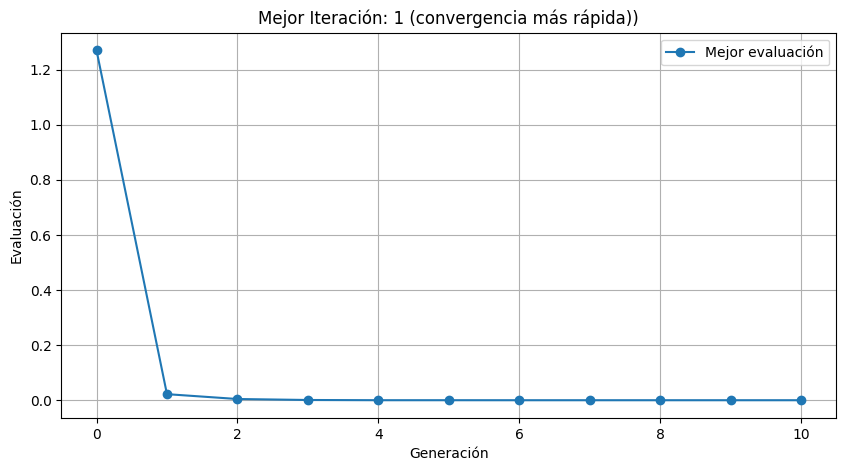

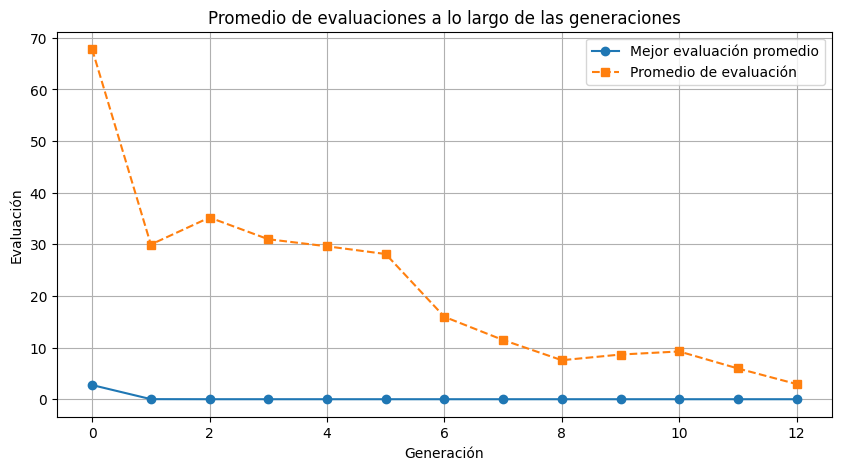

In [835]:
def iterar(n_veces=10):
    r, gen_t, eva_t, prom_t = [], [], [], []
    for i in range(n_veces):
        print(f"\n🔁 Iteración {i+1} de {n_veces} 🔁")
        mejor_hijo, mejor_aptitud, h, h_pp = AG(pob_size, n, a, b, decimales, proba_cruza, proba_muta, etapas, generaciones, umbral, max_sin_mejora)
        gen_t.append(len(h))
        eva_t.append(h)
        prom_t.append(h_pp)
        print("Mejor fenotipo (x1,...,xn):", mejor_hijo)
        print("Mejor evaluación f(x1,...,xn):", round(mejor_aptitud, decimales))

        r.append({
            "iteracion": i+1,
            "total_generaciones": len(h),
            "mejor_fenotipo": mejor_hijo,
            "mejor_evaluacion": round(mejor_aptitud, decimales),
            "historial": h,
            "historial_promedio": h_pp
        })

    convex = np.mean(gen_t)
    top = min(r, key=lambda x: x["mejor_evaluacion"])

    #guardar_r(r, convex, top)

    print("\n === RESUMEN FINAL === ")
    for res in r:
        print(f"\n Iteración {res['iteracion']}:")
        print("   Total de generaciones:", res["total_generaciones"])
        print("   Mejor genotipo:", res["mejor_fenotipo"])
        print("   Mejor evaluación f(x1,...,xn):", res["mejor_evaluacion"])

    print("\n Promedio de convergencia:", round(convex, 2), "generaciones")
    print(" La iteración que tiene la mínima evaluación es:", top["iteracion"],
          "con", top["total_generaciones"], "generaciones.")


    # graficar la mejor iteracion
    mejores = []
    mejor_so_far = np.inf
    for val in top["historial"]:
        if val < mejor_so_far:
            mejor_so_far = val
        mejores.append(mejor_so_far)

    plt.figure(figsize=(10, 5))
    plt.plot(mejores [::10], label="Mejor evaluación", marker="o")
    plt.xlabel("Generación")
    plt.ylabel("Evaluación")
    plt.title(f"Mejor Iteración: {top['iteracion']} (convergencia más rápida))")
    plt.legend()
    plt.grid(True)
    plt.show()

    max_gen = max(len(h) for h in eva_t)
    eval_matriz = np.zeros((n_veces, max_gen))
    prom_matriz = np.zeros((n_veces, max_gen))

    for i in range(n_veces):
        eval_matriz[i, :len(eva_t[i])] = eva_t[i]
        prom_matriz[i, :len(prom_t[i])] = prom_t[i]

    prom_eva = np.mean(eval_matriz, axis=0)
    prom_t = np.mean(prom_matriz, axis=0)

    plt.figure(figsize=(10, 5))
    plt.plot(prom_eva[::10], label="Mejor evaluación promedio", marker="o")
    plt.plot(prom_t[::10], label="Promedio de evaluación", linestyle="--", marker="s")
    plt.xlabel("Generación")
    plt.ylabel("Evaluación")
    plt.title("Promedio de evaluaciones a lo largo de las generaciones")
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    iterar(10)
